In [9]:
from HW2.benchmark_proceeder import BenchmarkStorage
from HW2.error_calculator import SquaredErrorCalculator
from HW2.optimization import RMSPropOptimization, NesterovOptimization
from HW2.regression_generator import generate_regression
from HW2.sgd import minibatch_gd, normalised_mini
from HW2.visualization import visualize_regression_point, visualize_line
import numpy as np

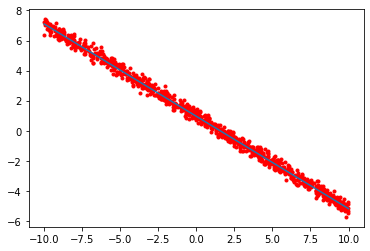

In [10]:
f, points = generate_regression(point_count=1000, scale=3, y_scale=0.25)

visualize_regression_point(f, points)

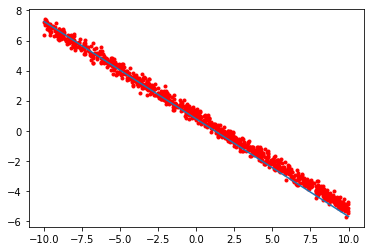

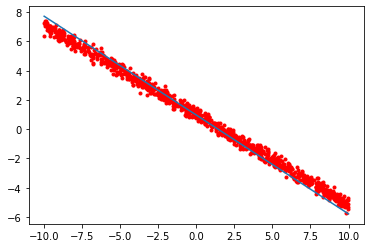

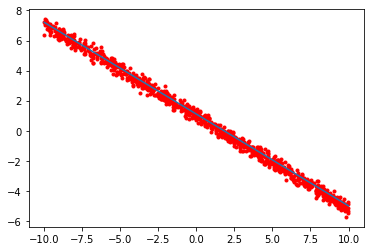

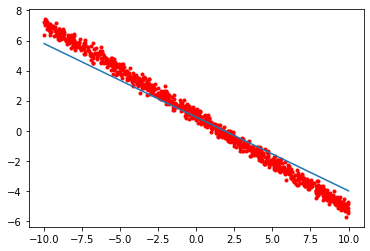

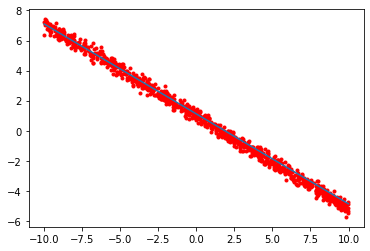

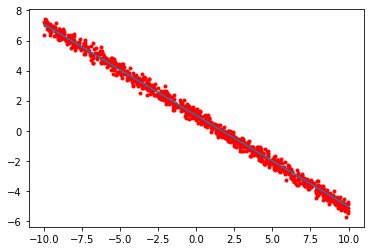

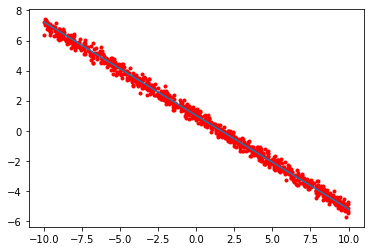

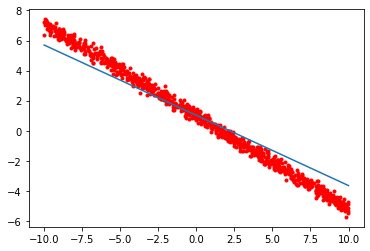

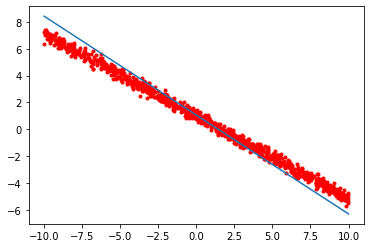

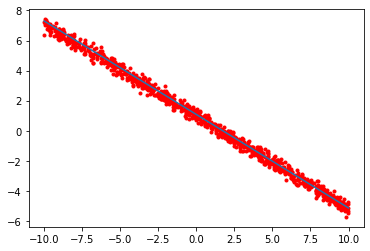

In [11]:
storage = BenchmarkStorage()
index = storage.add_benchmark_config()
for _ in range(10):
    ab, meta = minibatch_gd(points)
    storage.add_benchmark_result(index, meta)
    visualize_line(ab, points)


In [12]:
print(storage.get_benchmark_results(index))

Benchmark results for config <('sgd', False, <HW2.optimization.DefaultOptimization object at 0x000002113D4915B0>, <HW2.error_calculator.SquaredErrorCalculator object at 0x000002113D48B880>)>:
	Mean time:0.7245688
	Mean memory:267.06kB
	Mean SMAPE value:0.11125696138670471



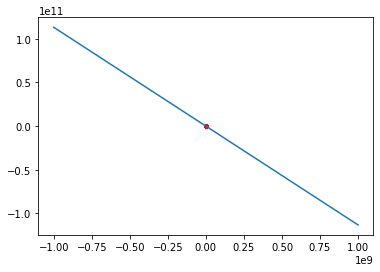

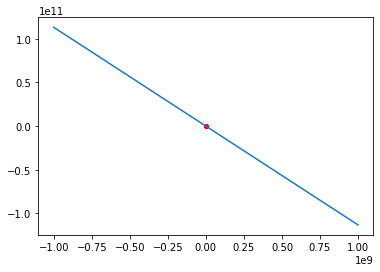

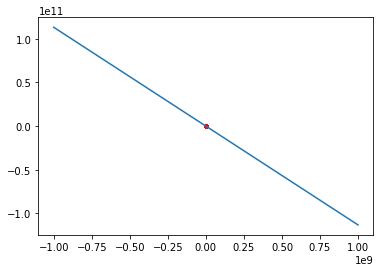

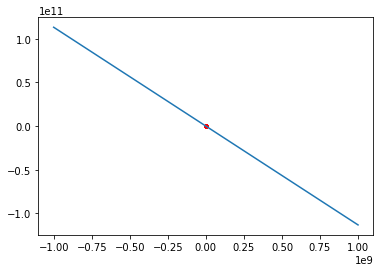

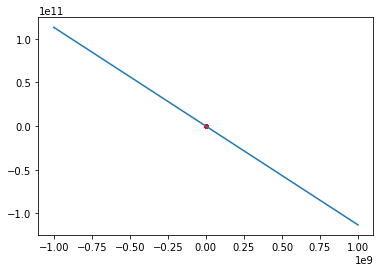

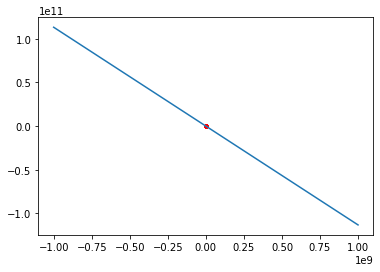

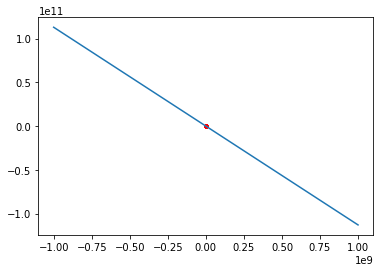

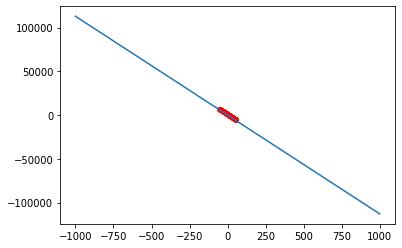

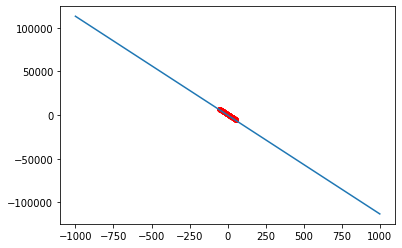

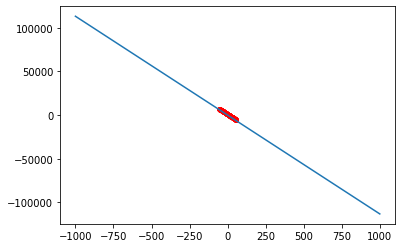

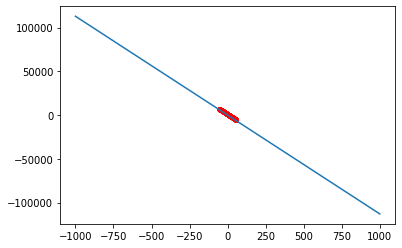

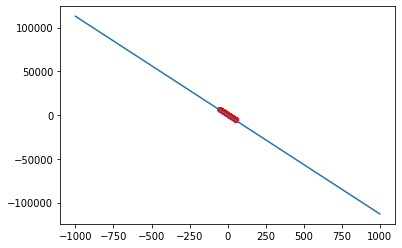

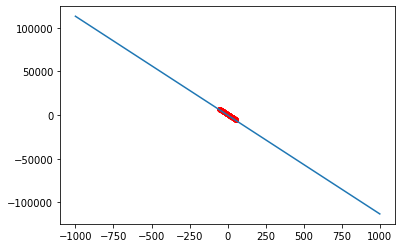

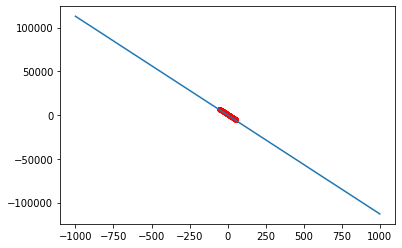

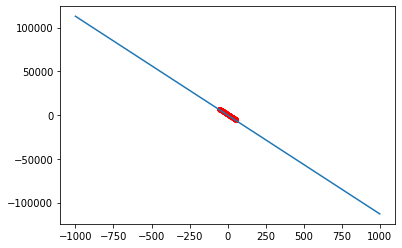

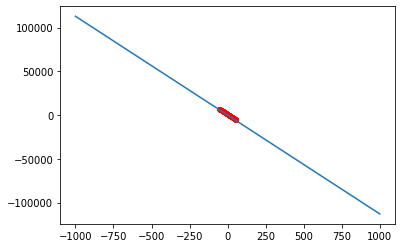

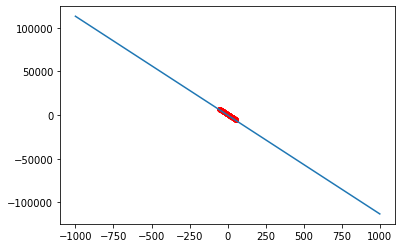

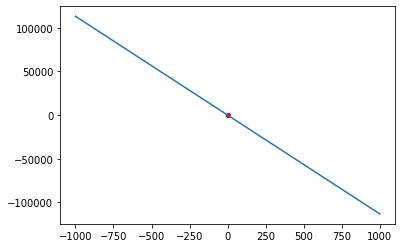

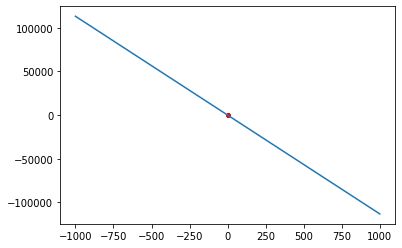

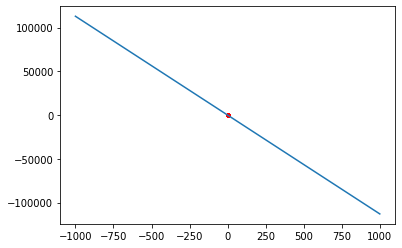

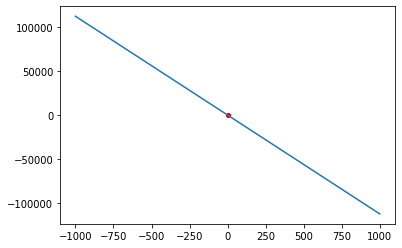

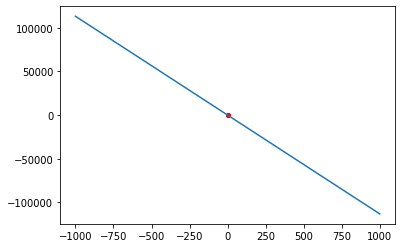

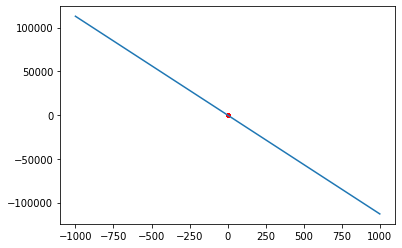

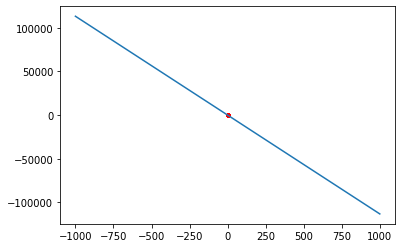

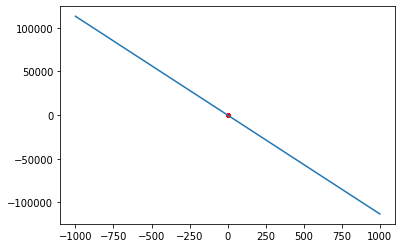

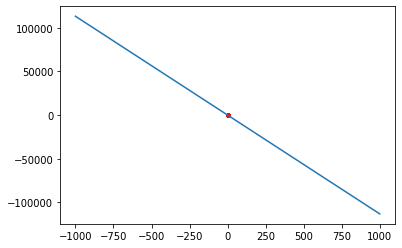

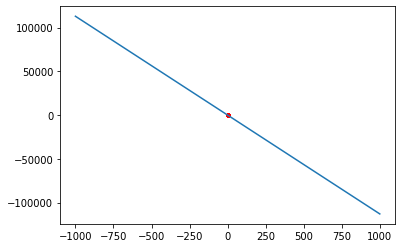

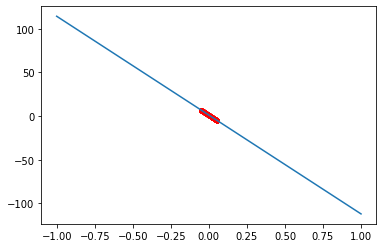

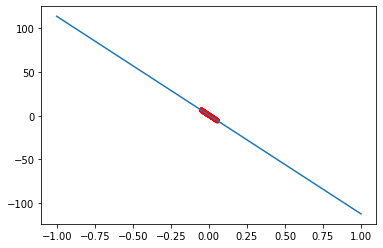

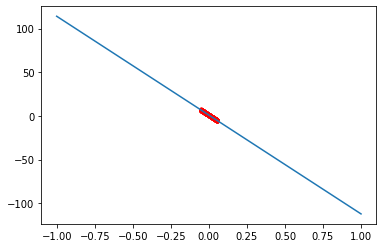

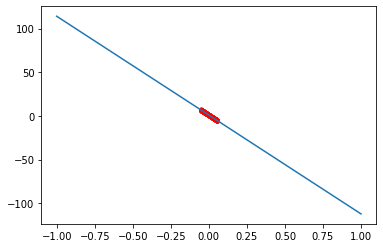

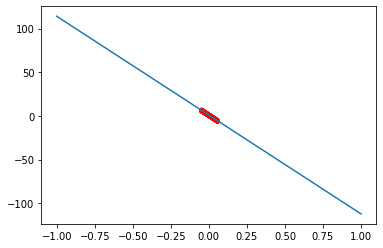

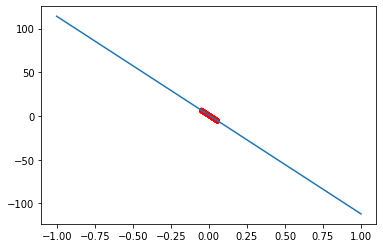

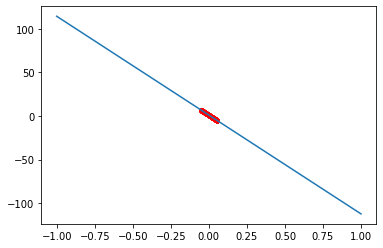

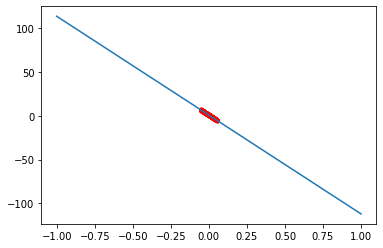

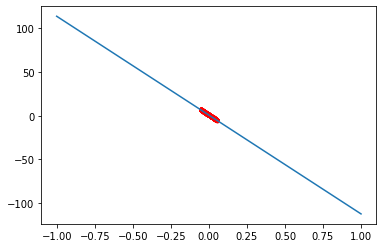

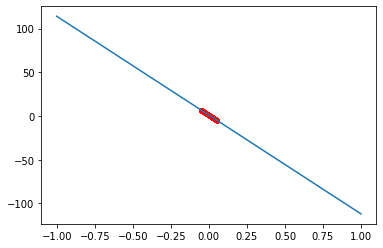

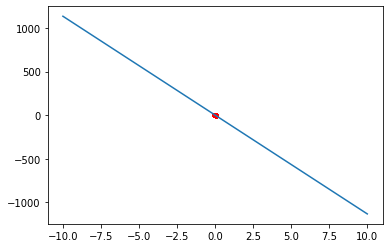

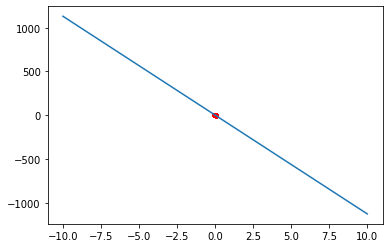

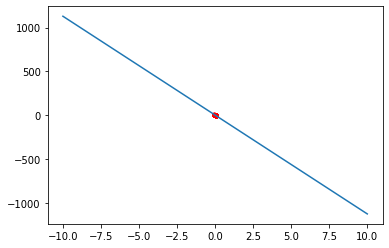

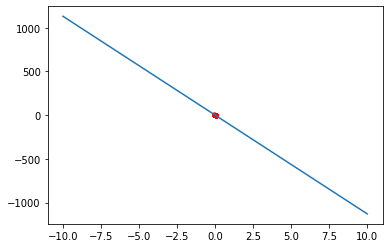

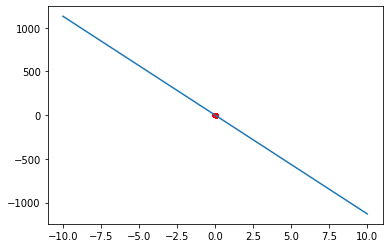

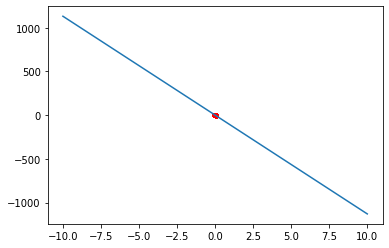

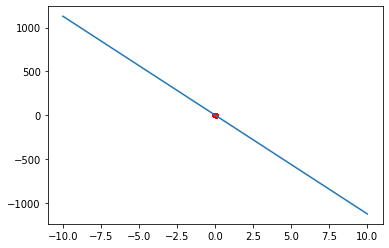

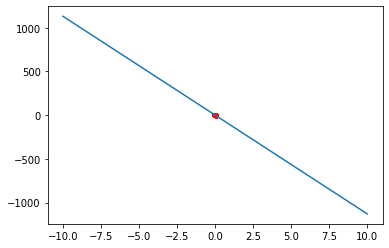

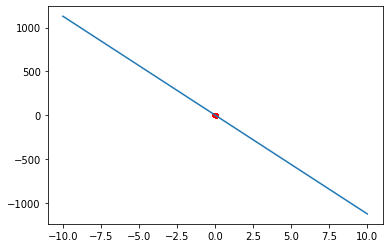

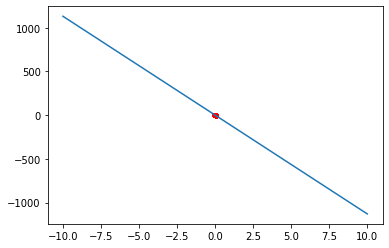

In [59]:
index = storage.add_benchmark_config(normalized=True)
for _ in range(10):
    ab, meta = normalised_mini(points)
    storage.add_benchmark_result(index, meta)
    visualize_line(ab,  points / np.array([np.linalg.norm(points[:, 0]), 1]), scale=10)

In [27]:
print(storage.get_benchmark_results(index))

Benchmark results for config <('sgd', True, <HW2.optimization.DefaultOptimization object at 0x000002113D4915B0>, <HW2.error_calculator.SquaredErrorCalculator object at 0x000002113D48B880>)>:
	Mean time:0.8249880999999999
	Mean memory:245.76kB
	Mean SMAPE value:0.09128988559831927



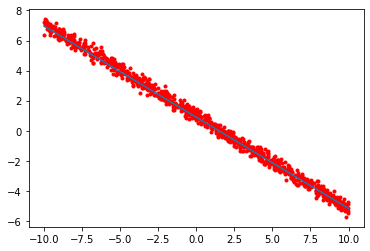

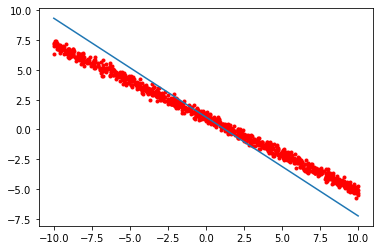

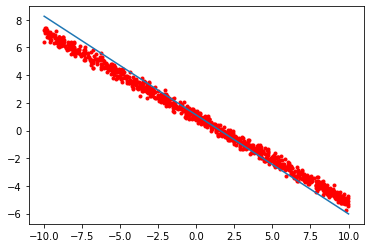

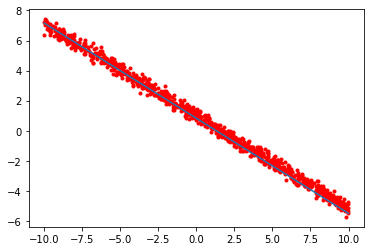

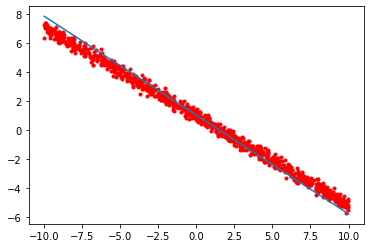

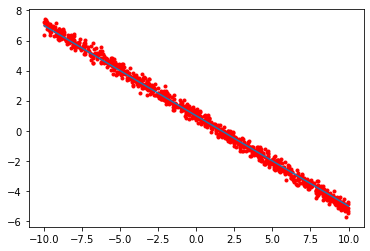

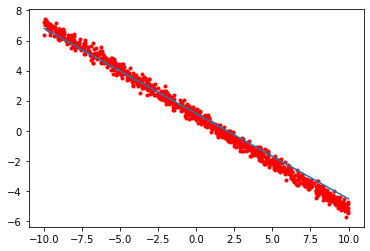

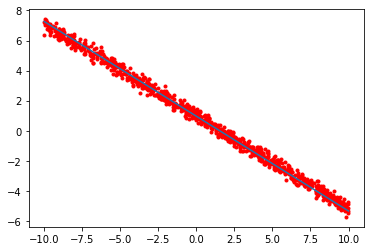

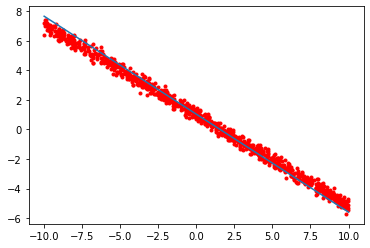

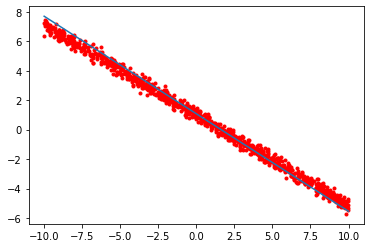

Benchmark results for config <('sgd', False, <HW2.optimization.NesterovOptimization object at 0x000002110021F820>, <HW2.error_calculator.SquaredErrorCalculator object at 0x000002113D48B880>)>:
	Mean time:0.5602145000000001
	Mean memory:228.56kB
	Mean SMAPE value:0.10297637835279756



In [15]:
index = storage.add_benchmark_config(optimiser=NesterovOptimization(0.5))
for _ in range(10):
    ab, meta = minibatch_gd(points)
    storage.add_benchmark_result(index, meta)
    visualize_line(ab, points)
print(storage.get_benchmark_results(index))

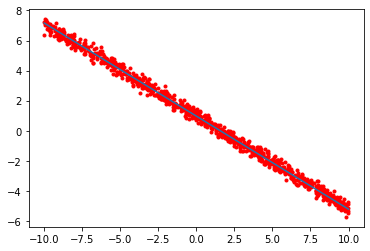

0.07765106964781486


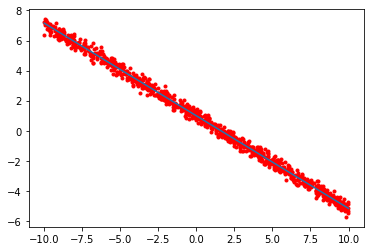

0.0768772231487731


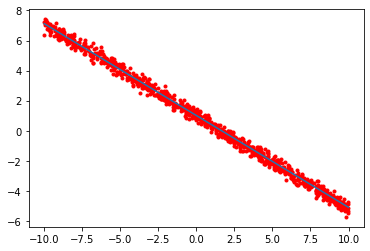

0.07781825567001383


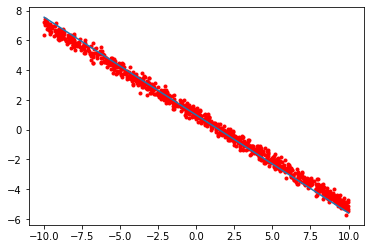

0.08890407171079859


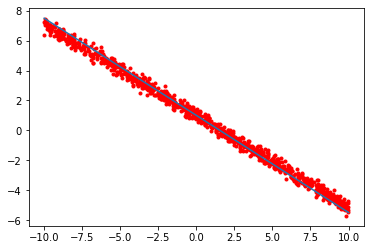

0.0849522553747805


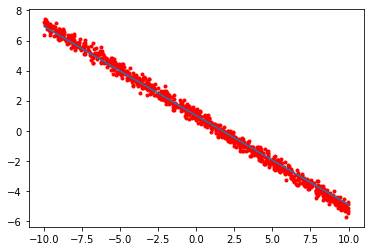

0.0824880258988859


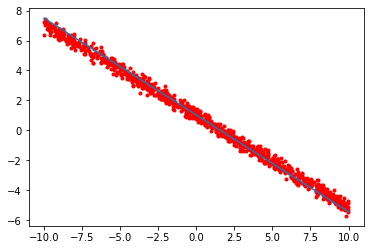

0.08241757139776856


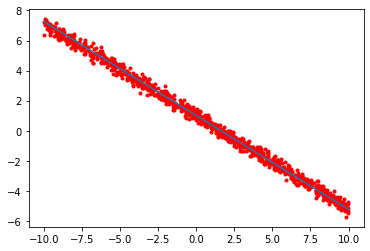

0.07715213836182253


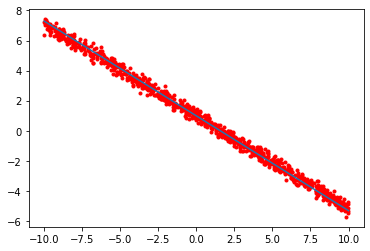

0.0785351470368871


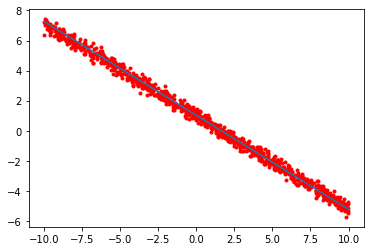

0.07707868345609757
Benchmark results for config <('mini200', False, <HW2.optimization.NesterovOptimization object at 0x00000211004CA610>, <HW2.error_calculator.SquaredErrorCalculator object at 0x000002113D48B880>)>:
	Mean time:4.363218600000001
	Mean memory:24.99kB
	Mean SMAPE value:0.08038744417036425



In [16]:
index = storage.add_benchmark_config(batch_size='mini200', optimiser=NesterovOptimization(0.5))
for _ in range(10):
    ab, meta = minibatch_gd(points, batch_size=25)
    storage.add_benchmark_result(index, meta)
    visualize_line(ab, points)
    print(meta['smape'])
print(storage.get_benchmark_results(index))

In [62]:
points

array([[-0.45050129,  1.29393314],
       [ 7.14908273, -3.41342354],
       [ 0.07440802,  0.83283472],
       ...,
       [-2.82737154,  2.83768831],
       [ 5.88636313, -2.62672857],
       [-6.31455311,  5.09510218]])

In [61]:
points / np.array([np.linalg.norm(points[:, :-1]), 1])

array([[-2.45122517e-03,  1.29393314e+00],
       [ 3.88989154e-02, -3.41342354e+00],
       [ 4.04861912e-04,  8.32834720e-01],
       ...,
       [-1.53840276e-02,  2.83768831e+00],
       [ 3.20283244e-02, -2.62672857e+00],
       [-3.43581514e-02,  5.09510218e+00]])